<a href="https://www.kaggle.com/code/mrsimple07/youtube-videos-analysis?scriptVersionId=167044895" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-videos-dataset/youtube.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/youtube-trending-videos-dataset/youtube.csv')
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


**Popular words in titles and tags**

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df['title_tokens'] =df['title'].apply(preprocess_text)
df['tags_tokens'] = df['tags'].apply(preprocess_text)

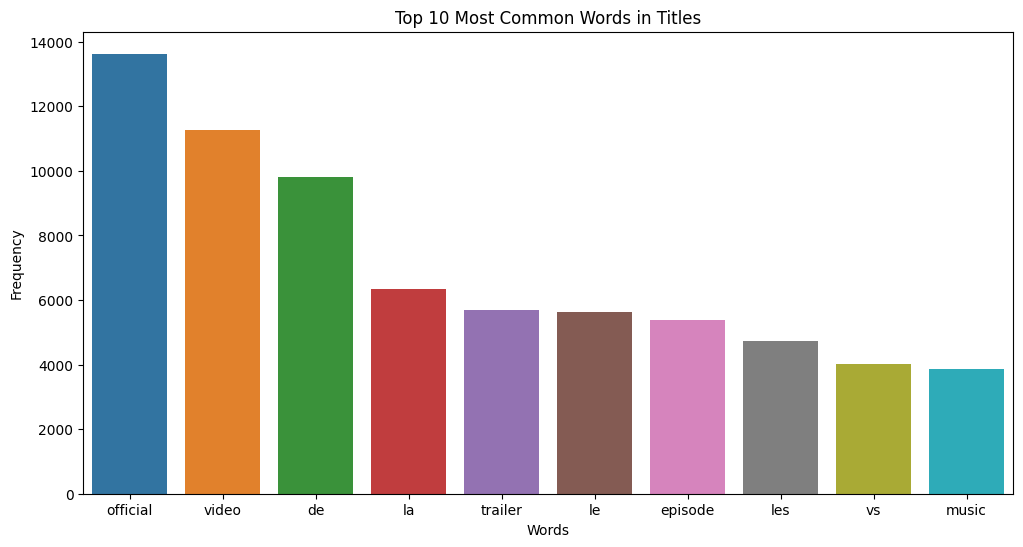

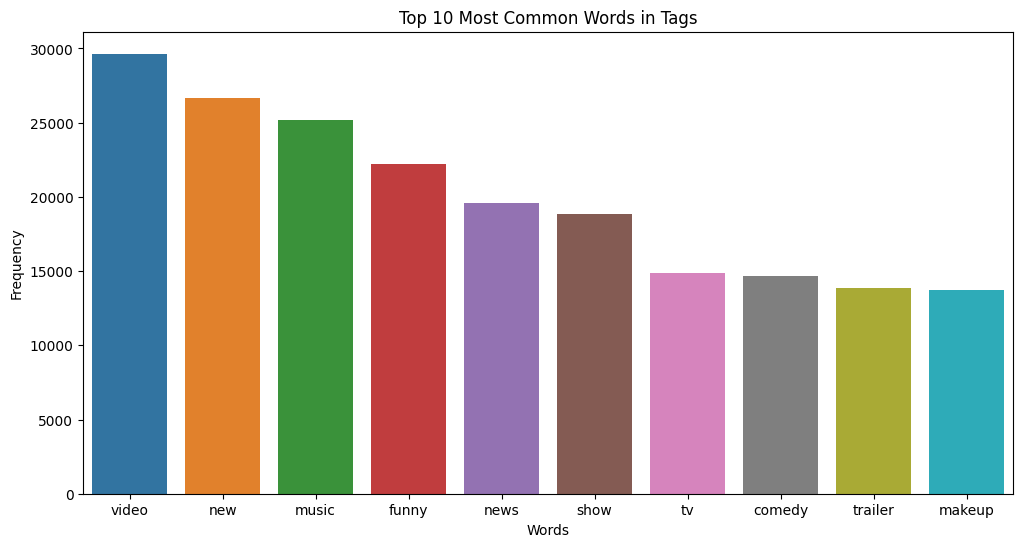

In [5]:
# Flatten the lists of tokens
all_title_tokens = [token for sublist in df['title_tokens'] for token in sublist]
all_tags_tokens = [token for sublist in df['tags_tokens'] for token in sublist]

# Get the most common words in titles and tags
top_title_words = Counter(all_title_tokens).most_common(10)
top_tags_words = Counter(all_tags_tokens).most_common(10)

# Plot the most common words in titles
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_title_words], y=[word[1] for word in top_title_words])
plt.title('Top 10 Most Common Words in Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_tags_words], y=[word[1] for word in top_tags_words])
plt.title('Top 10 Most Common Words in Tags')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

**Channel Analysis by views, likes, comments**

In [6]:
import seaborn as sns

top_channels_views = df.groupby('channel_title')['views'].sum().sort_values(ascending = False).head(10)

top_channels_likes = df.groupby('channel_title')['likes'].sum().sort_values(ascending=False).head(10)

top_channels_comments = df.groupby('channel_title')['comment_count'].sum().sort_values(ascending=False).head(10)

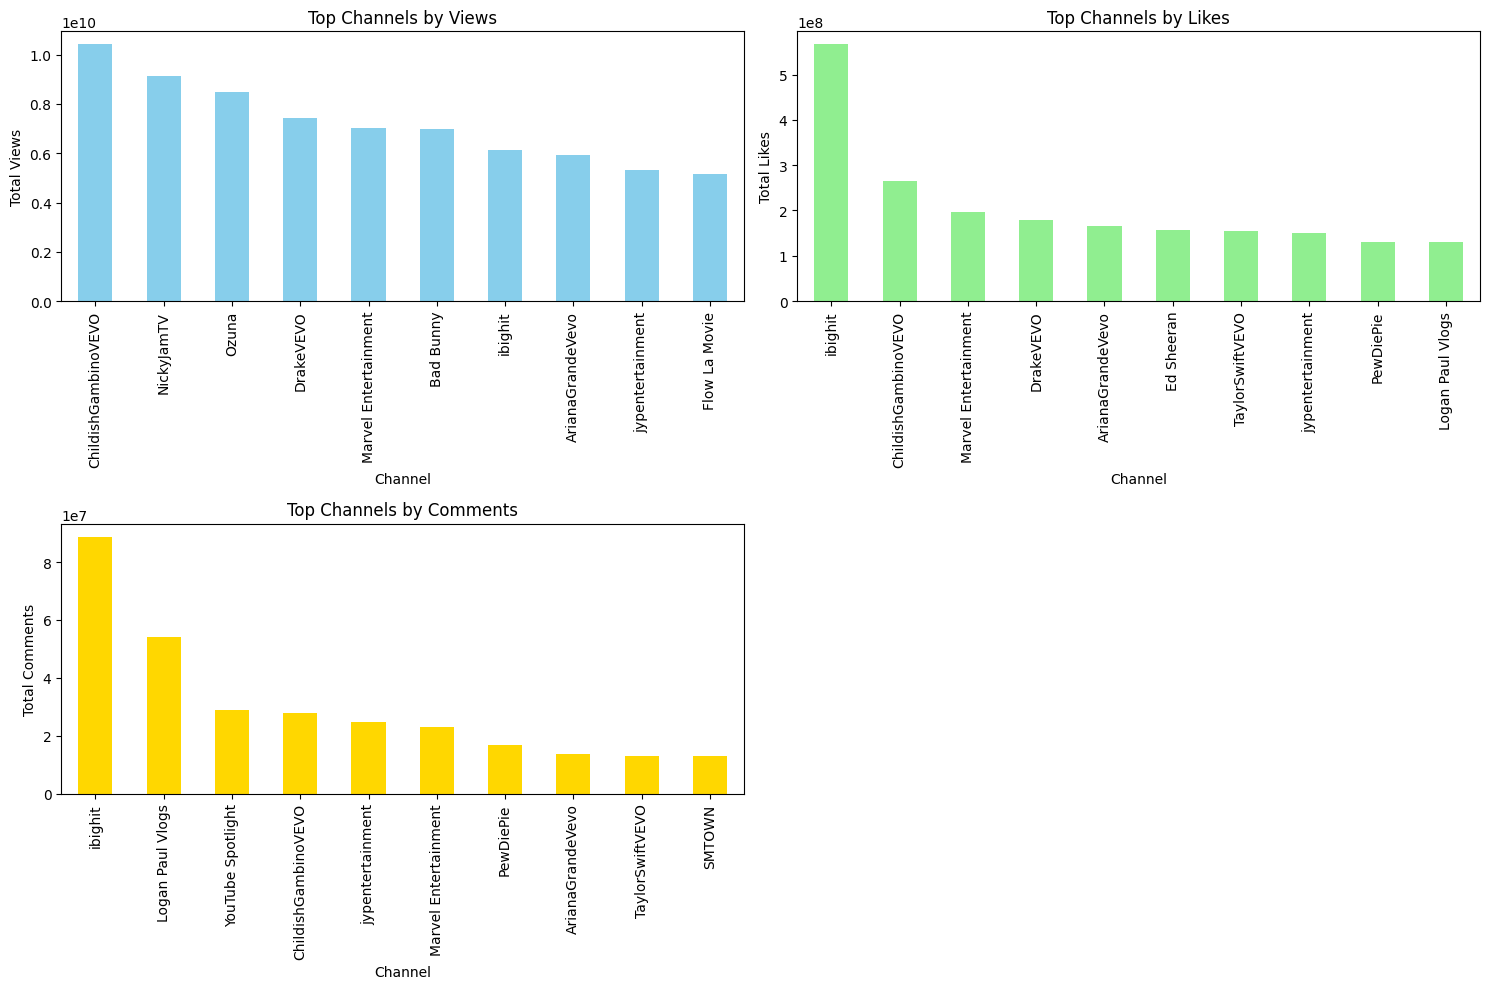

In [7]:
#Plotting
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
top_channels_views.plot(kind = 'bar', color = 'skyblue')
plt.title('Top Channels by Views')
plt.xlabel('Channel')
plt.ylabel('Total Views')

# Top Channels by Likes
plt.subplot(2, 2, 2)
top_channels_likes.plot(kind='bar', color='lightgreen')
plt.title('Top Channels by Likes')
plt.xlabel('Channel')
plt.ylabel('Total Likes')

# Top Channels by Comments
plt.subplot(2, 2, 3)
top_channels_comments.plot(kind='bar', color='gold')
plt.title('Top Channels by Comments')
plt.xlabel('Channel')
plt.ylabel('Total Comments')

plt.tight_layout()
plt.show()